##Dimensionality Reduction

Pengurangan dimensi adalah proses pengurangan jumlah variabel atau atribut acak yang sedang dipertimbangkan. Reduksi data berdimensi tinggi, sebagai bagian dari langkah pra-pemrosesan data, sangat penting dalam banyak aplikasi dunia nyata. Pengurangan dimensi tinggi telah muncul sebagai salah satu tugas penting dalam aplikasi data mining. Misalnya, Anda mungkin memiliki kumpulan data dengan ratusan fitur (kolom di database Anda). Kemudian reduksi dimensionalitas adalah Anda mengurangi fitur atribut data tersebut dengan menggabungkan atau menggabungkannya sedemikian rupa sehingga tidak akan kehilangan banyak karakteristik signifikan dari dataset asli. Salah satu masalah utama yang terjadi dengan data berdimensi tinggi secara luas dikenal sebagai "Curse of Dimensionality". Ini mendorong kami untuk mengurangi dimensi data kami jika kami ingin menggunakannya untuk analisis.


###Feature Selection
 mengurangi jumlah fitur termasuk:
1. Mengurangi biaya komputasi

2. Mengurangi biaya yang terkait dengan pengumpulan data

3. Meningkatkan Interpretabilitas


Kelas-kelas dalam modul sklearn.feature_selection dapat digunakan untuk pemilihan fitur/pengurangan dimensi pada kumpulan sampel, baik untuk meningkatkan skor akurasi penduga atau untuk meningkatkan kinerjanya pada kumpulan data berdimensi sangat tinggi.

###Univariate Feature Selection
bekerja dengan memilih fitur terbaik berdasarkan uji statistik univariat. Hal ini dapat dilihat sebagai langkah preprocessing untuk estimator. Scikit-learn memaparkan rutinitas pemilihan fitur sebagai objek yang mengimplementasikan metode transformasi:
*  SelectKBest menghapus semua kecuali k fitur skor tertinggi
*  SelectPercentile menghapus semua kecuali persentase fitur dengan skor tertinggi yang ditentukan pengguna
*  GenericUnivariateSelect memungkinkan untuk melakukan pemilihan fitur univariat dengan strategi yang dapat dikonfigurasi. Hal ini memungkinkan untuk memilih strategi seleksi univariat terbaik dengan estimator pencarian hyper-parameter.





Jadi scikit-learn hadir dengan beberapa kumpulan data standar kecil yang tidak perlu mengunduh file apa pun dari beberapa situs web eksternal. Mereka dapat dimuat menggunakan fungsi-fungsi yang telah di tentukan

In [1]:
#import library
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#disini kita menggunkan dataset dari sklearn yaitu laod_iris
#kita bisa liat Deskripsi pada dataset menggunakan fungsi DESCR
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import load_iris
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
SelectKBest?

In [3]:
iris = load_iris()
iris_data = iris.data

In [4]:
iris_data.shape
#150 observasi dan 4 kolom

(150, 4)

In [5]:
X, y = load_iris(return_X_y=True)

sel = SelectKBest(chi2, k=2)

sel.fit(X, y)

SelectKBest(k=2, score_func=<function chi2 at 0x7f6f646c53b0>)

In [6]:
sel.transform(X).shape

(150, 2)

In [7]:
sel.scores_

array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ])

###correlation matrix with heatmap 
correlation matrix adalah tabel yang menunjukkan koefisien korelasi antar variabel. Setiap sel dalam tabel menunjukkan korelasi antara dua variabel. Matriks korelasi digunakan untuk meringkas data.

Correlation heatmap representasi grafis dari matriks korelasi yang mewakili korelasi antara variabel yang berbeda. Nilai korelasi dapat mengambil nilai dari -1 sampai 1. . Korelasi antara dua variabel 

In [8]:
import seaborn
from vega_datasets import data

In [9]:
cars = data.cars()
cars.tail()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA
405,chevy s-10,31.0,4,119.0,82.0,2720,19.4,1982-01-01,USA


In [10]:
cars.columns

Index(['Name', 'Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs', 'Acceleration', 'Year', 'Origin'],
      dtype='object')

In [11]:
# kerangka data baru hanya kolom dengan angka
cars = cars[['Acceleration', 'Cylinders', 'Displacement', 'Horsepower', 'Miles_per_Gallon', 'Weight_in_lbs']]
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
0,12.0,8,307.0,130.0,18.0,3504
1,11.5,8,350.0,165.0,15.0,3693
2,11.0,8,318.0,150.0,18.0,3436
3,12.0,8,304.0,150.0,16.0,3433
4,10.5,8,302.0,140.0,17.0,3449


In [12]:
#correlation
cars.corr()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
Acceleration,1.000000,-0.522452,-0.557984,-0.697124,0.420289,-0.430086
Cylinders,-0.522452,1.000000,0.951787,0.844158,-0.775396,0.895220
Displacement,-0.557984,0.951787,1.000000,0.898326,-0.804203,0.932475
Horsepower,-0.697124,0.844158,0.898326,1.000000,-0.778427,0.866586
Miles_per_Gallon,0.420289,-0.775396,-0.804203,-0.778427,1.000000,-0.831741
Weight_in_lbs,-0.430086,0.895220,0.932475,0.866586,-0.831741,1.000000


In [ ]:
cars.corr?

In [13]:
#koefisien korelasi menggunakan statistik scipy
from scipy import stats
stats.pearsonr(cars.Cylinders, cars.Acceleration)

(-0.5224515124210524, 8.183538342206756e-30)

Text(0.5, 1.0, 'Seaborn')

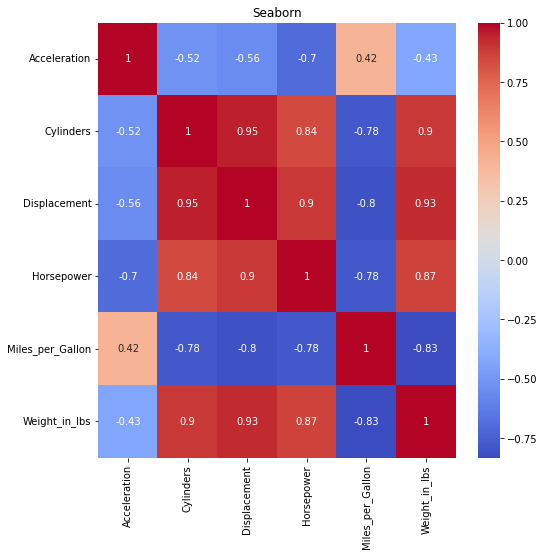

In [14]:
#Seaborn Correlation Heatmap
plt.figure(figsize=(8,8))
seaborn.heatmap(cars.corr(), annot=True, cmap="coolwarm").set_title('Seaborn')

In [15]:
#Correlation Matrix with Color Map / Heat Map
cars.corr().style.background_gradient(cmap='coolwarm')

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
Acceleration,1.000000,-0.522452,-0.557984,-0.697124,0.420289,-0.430086
Cylinders,-0.522452,1.000000,0.951787,0.844158,-0.775396,0.895220
Displacement,-0.557984,0.951787,1.000000,0.898326,-0.804203,0.932475
Horsepower,-0.697124,0.844158,0.898326,1.000000,-0.778427,0.866586
Miles_per_Gallon,0.420289,-0.775396,-0.804203,-0.778427,1.000000,-0.831741
Weight_in_lbs,-0.430086,0.895220,0.932475,0.866586,-0.831741,1.000000
